In [1]:
import numpy as np
import pandas as pd
import ssl
import copy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import random
from pprint import pprint

from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 

from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import wordcloud

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer

import scikitplot as skplt
import matplotlib.pyplot as plt



In [2]:
def clean_statement(statement):
#     x = re.sub('-', ' ', x)
    statement = re.sub('$', ' ', statement)
    statement = re.sub('[^A-Za-z]+', ' ', statement)
    statement = re.sub('[,|.|?|\n]|\t', '', statement)
    statement = re.sub('n\'t', ' ', statement)
    statement = re.sub('submission|submissions|Submission|submission|th ', '', statement)
    statement = re.sub('one|two|given|need', '', statement)
    
    return statement

In [3]:
def process_problem_statement(q_statement):
    
    q_statement = clean_statement(q_statement)
    
#     q_statement = re.sub('[^A-Za-z]+', ' ', q_statement)
    
    tokens = word_tokenize(q_statement)
    
    stoplist = set(stopwords.words('english'))
    
    word_list = [i for i in q_statement.lower().split() if i not in stoplist]
    
    ps = PorterStemmer()
    
#     word_list = [ps.stem(word) for word in word_list]
    
    q_statement = ' '.join(word_list)
    
#     print(q_statement)
    
    return q_statement

In [4]:
def process_problem_solution(solution):
    
#     solution = clean_statement(solution)
    
    tokens = word_tokenize(solution)
    
    stoplist = set(stopwords.words('english'))
    
    word_list = [i for i in solution.lower().split() if i not in stoplist]
    
#     ps = PorterStemmer()
    
#     word_list = [ps.stem(word) for word in word_list]
    
    solution = ' '.join(word_list)
    
#     print(q_statement)
    
    return solution

In [5]:
def process_time_taken(time_col):
#     print(time_col.split())
    return time_col.split()[0]

In [6]:
def process_tags(all_tags_list,tag_col):
    
#     print(tag_col)
    tags_present = list(re.split(',',tag_col))
    
    
    tags_set = set(tags_present)
    tags_diff = tags_set.difference(set(all_tags_list))
    
    new_set = tags_set.difference(tags_diff)
#     print(new_set)
    return list(new_set)
    

In [7]:
def get_all_distinct_tags(tags_col):
    
    tags_list = []
    
    t_sets = set(tags_list)
    
    for row in tags_col:
#         print(row)
        t_list = re.split(',',row)
#         print(t_list)
        t_sets = t_sets.union(set(t_list))
#         print(t_sets)
    tags_list = list(t_sets)
    
    stoplist = set(stopwords.words('english'))
    
    word_list = [i for i in tags_list if i not in stoplist]
    
    return tags_list

In [13]:
# tag list obtained from the dataset
# global tags_list

tags_list = ['dsu', 'trees', 'chinese remainder theorem', 'sortings', 'games', 'implementation', 'bitmasks',
              '*special', 'hashing', 'geometry', 'two pointers', 'combinatorics', 'flows', 'strings',
              'probabilities', 'data structures', 'ternary search', 'greedy', 'math', 'matrices',
              'divide and conquer', 'dfs and similar', 'constructive algorithms', 'brute force', 'dp',
              '2-sat', 'graph matchings', 'binary search', 'number theory', 'graphs', 'fft', 'shortest paths',
              'schedules', 'meet-in-the-middle', 'string suffix structures', 'expression parsing']



In [9]:
def data_preprocessing():
    
    df = pd.read_csv("codeforces_question_v4.csv")
    df = df.drop(['id','name','author'],axis = 1)
    df = df[df.solution != "no code found"]
    
    global distinct_tags
    
    distinct_tags = get_all_distinct_tags(df["tags"])
    
    print(df.columns)
#     print(df.head)
    print()

    print(distinct_tags)
    
    print()
    
    df["problem statement"] = [process_problem_statement(x) for x in df["problem statement"]]
    df["solution"] = [process_problem_solution(x) for x in df["solution"]]
    df["time_taken"] = [process_time_taken(x) for x in df["time_taken"]]
    
    X = copy.deepcopy(df["solution"])
    Y = [process_tags(distinct_tags,x) for x in df["tags"]]
    
    
    
#     print()
#     print(X)
#     print()
#     print(Y)
#     print()
    
#     print(type(X))
    
    X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size = 0.2, random_state = 0)
#     print(type(X_train))
#     print(X_train.shape)
    
    return X_train, X_validation, Y_train, Y_validation

In [10]:
X_train, X_validation, Y_train, Y_validation = data_preprocessing()

Index(['problem statement', 'tags', 'difficulty', 'solution', 'time_taken'], dtype='object')

['fft', 'chinese remainder theorem', 'brute force', 'number theory', 'graph matchings', 'string suffix structures', 'greedy', 'dp', 'two pointers', 'dfs and similar', 'sortings', 'schedules', 'bitmasks', 'geometry', 'combinatorics', 'games', 'flows', 'matrices', 'implementation', 'divide and conquer', '2-sat', 'hashing', 'binary search', 'probabilities', '*special', 'math', 'trees', 'ternary search', 'data structures', 'shortest paths', 'constructive algorithms', 'dsu', 'graphs', 'expression parsing', 'strings', 'meet-in-the-middle']



In [11]:
def comments():
    
    #     global tags_list
    #     print(set(distinct_tags).difference(set(tags_list)))


    #     print(df["tags"])  
    #     print(df[df['difficulty'] == ''])

    #     np.where(df.applymap(lambda x: x == ''))

    #     nan_rows = df[df['difficulty'].isna()]
    #     print(nan_rows)
    #     print(df["difficulty"].describe())
    #     print(df["solution"].describe())

    #     print(df["time_taken"])


    #     one_hot = pd.get_dummies(df['tags'])
    #     # Drop column B as it is now encoded
    #     df = df.drop('tags',axis = 1)
    #     # Join the encoded df
    #     df = df.join(one_hot)
    #     print(df)


    #     print(distinct_tags)
    #     print(df.describe())
    #     print(df["problem statement"])
    #     print(df["tags"])

    #     cloud = wordcloud.WordCloud(background_color='black', max_font_size=60, relative_scaling=.5).generate(' '.join(df["solution"]))
    #     plt.figure(figsize=(20,10))
    #     plt.axis('off')
    #     plt.imshow(cloud);
    
    
    #############################################################################################
    
    #OneVsRestClassifier(MultinomialNB())
    #OneVsRestClassifier(LinearSVC())
    #OneVsRestClassifier(LogisticRegression(solver='sag'))

    # classifier.fit(X_train, Y)
    # predicted = classifier.predict(X_test)
    # all_labels = mlb.inverse_transform(predicted)
    # predicted = copy.deepcopy(all_labels)
    # print(list(map(list, all_labels)))
    # all_labels = list(map(list, all_labels))
    # print(all_labels)
    # all_labels = all_labels.append(distinct_tags)
    # target_names.append(distinct_tags)

    # print(target_names)
    # print(all_labels)
    
    # print("Accuracy: ",accuracy_score(mlb.fit_transform(target_names),mlb.fit_transform(all_labels)))
    # print()
    # for item, labels in zip(target_names, predicted):
    #     print('{0} => {1}'.format(item, ', '.join(labels)))
    
    pass

Index(['problem statement', 'tags', 'difficulty', 'solution', 'time_taken'], dtype='object')

['fft', 'chinese remainder theorem', 'brute force', 'number theory', 'graph matchings', 'string suffix structures', 'greedy', 'dp', 'two pointers', 'dfs and similar', 'sortings', 'schedules', 'bitmasks', 'geometry', 'combinatorics', 'games', 'flows', 'matrices', 'implementation', 'divide and conquer', '2-sat', 'hashing', 'binary search', 'probabilities', '*special', 'math', 'trees', 'ternary search', 'data structures', 'shortest paths', 'constructive algorithms', 'dsu', 'graphs', 'expression parsing', 'strings', 'meet-in-the-middle']

['implementation', 'brute force', 'math'] => 
['implementation', 'data structures'] => dfs and similar
['graphs', 'dfs and similar', 'hashing'] => dfs and similar
['binary search'] => binary search, greedy
['bitmasks', 'divide and conquer', 'graphs', 'brute force'] => data structures
['implementation'] => implementation, math
['implementation'] => 
['strings', 'd

/home/prakashjha/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/prakashjha/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


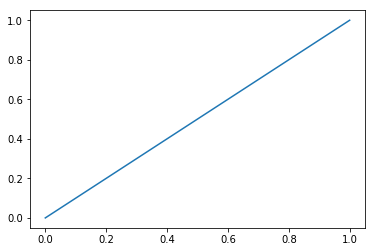

Processing tag: chinese remainder theorem
Test accuracy is 0.9085714285714286
Test recall_score is 0.0
Test precision_score is 0.0
Test f1_score is 0.0



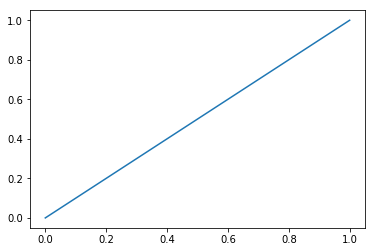

Processing tag: brute force
Test accuracy is 0.9497142857142857
Test recall_score is 0.045454545454545456
Test precision_score is 0.041666666666666664
Test f1_score is 0.043478260869565216



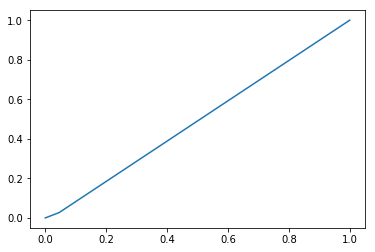

Processing tag: number theory
Test accuracy is 0.8662857142857143
Test recall_score is 0.01694915254237288
Test precision_score is 0.6666666666666666
Test f1_score is 0.03305785123966942



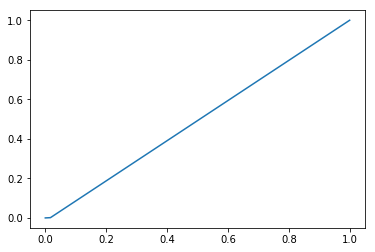

Processing tag: graph matchings
Test accuracy is 0.9611428571428572
Test recall_score is 0.0
Test precision_score is 0.0
Test f1_score is 0.0



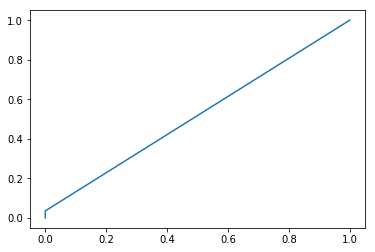

Processing tag: string suffix structures
Test accuracy is 0.9622857142857143
Test recall_score is 0.0
Test precision_score is 0.0
Test f1_score is 0.0



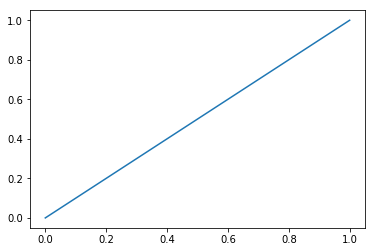

Processing tag: greedy
Test accuracy is 0.8445714285714285
Test recall_score is 0.0
Test precision_score is 0.0
Test f1_score is 0.0



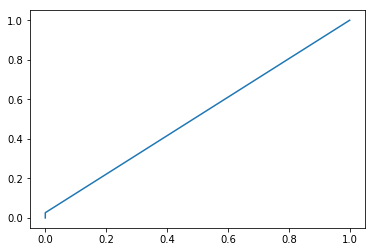

Processing tag: dp
Test accuracy is 0.8274285714285714
Test recall_score is 0.023076923076923078
Test precision_score is 0.1111111111111111
Test f1_score is 0.03821656050955414



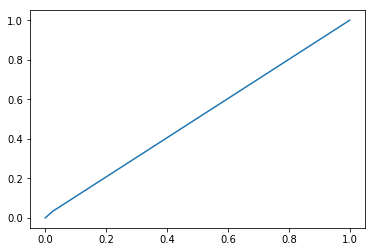

Processing tag: two pointers
Test accuracy is 0.8171428571428572
Test recall_score is 0.11827956989247312
Test precision_score is 0.12359550561797752
Test f1_score is 0.12087912087912088



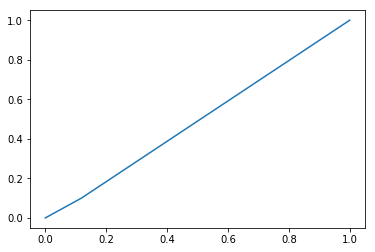

Processing tag: dfs and similar
Test accuracy is 0.9348571428571428
Test recall_score is 0.09090909090909091
Test precision_score is 0.05128205128205128
Test f1_score is 0.06557377049180327



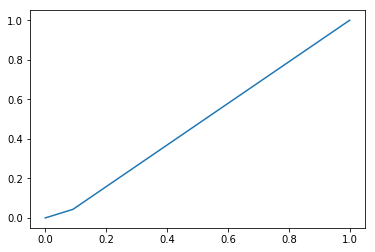

Processing tag: sortings
Test accuracy is 0.8045714285714286
Test recall_score is 0.0
Test precision_score is 0.0
Test f1_score is 0.0



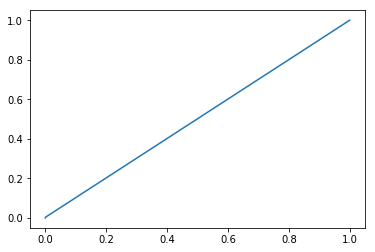

Processing tag: schedules
Test accuracy is 0.864
Test recall_score is 0.0
Test precision_score is 0.0
Test f1_score is 0.0



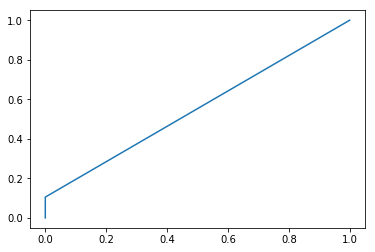

Processing tag: bitmasks
Test accuracy is 0.9908571428571429
Test recall_score is 0.0
Test precision_score is 0.0
Test f1_score is 0.0



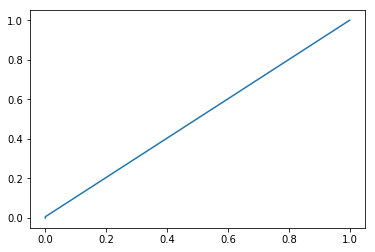

Processing tag: geometry
Test accuracy is 0.9977142857142857
Test recall_score is 0.0
Test precision_score is 0.0
Test f1_score is 0.0



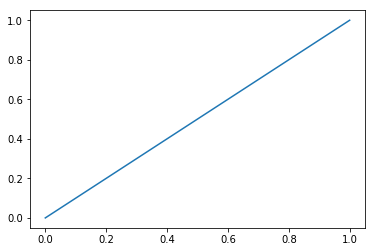

Processing tag: combinatorics
Test accuracy is 0.984
Test recall_score is 0.0
Test precision_score is 0.0
Test f1_score is 0.0



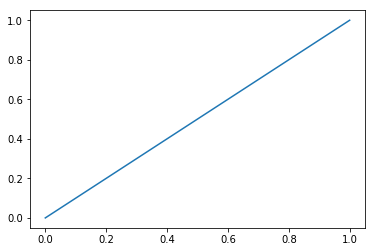

Processing tag: games
Test accuracy is 0.9828571428571429
Test recall_score is 0.0
Test precision_score is 0.0
Test f1_score is 0.0



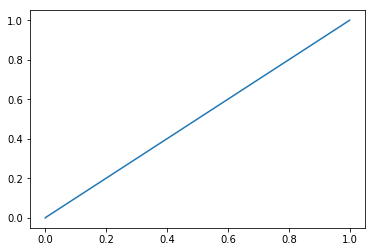

Processing tag: flows
Test accuracy is 0.9577142857142857
Test recall_score is 0.0
Test precision_score is 0.0
Test f1_score is 0.0



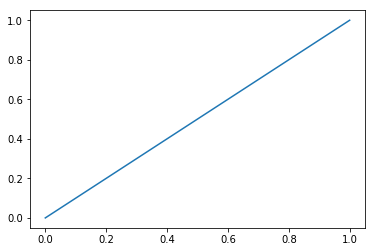

Processing tag: matrices
Test accuracy is 0.9748571428571429
Test recall_score is 0.0
Test precision_score is 0.0
Test f1_score is 0.0



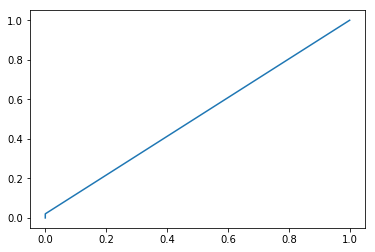

Processing tag: implementation
Test accuracy is 0.9028571428571428
Test recall_score is 0.0
Test precision_score is 0.0
Test f1_score is 0.0



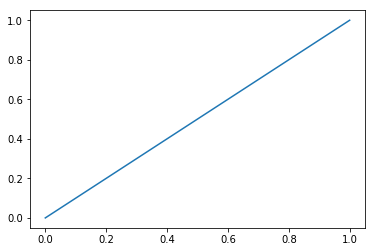

Processing tag: divide and conquer
Test accuracy is 0.7497142857142857
Test recall_score is 0.026041666666666668
Test precision_score is 0.13513513513513514
Test f1_score is 0.04366812227074236



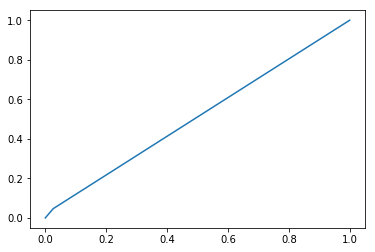

Processing tag: 2-sat
Test accuracy is 0.8937142857142857
Test recall_score is 0.047619047619047616
Test precision_score is 0.013513513513513514
Test f1_score is 0.021052631578947368



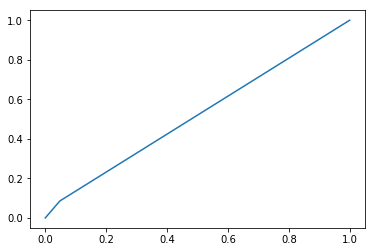

Processing tag: hashing
Test accuracy is 0.6925714285714286
Test recall_score is 0.0
Test precision_score is 0.0
Test f1_score is 0.0



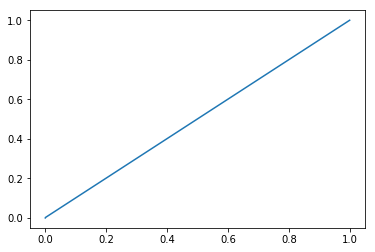

Processing tag: binary search
Test accuracy is 0.6125714285714285
Test recall_score is 0.20918367346938777
Test precision_score is 0.18222222222222223
Test f1_score is 0.19477434679334918



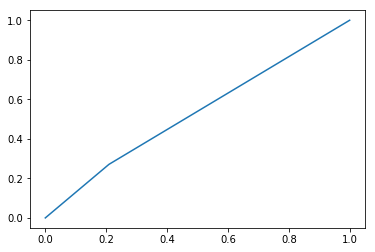

Processing tag: probabilities
Test accuracy is 0.8788571428571429
Test recall_score is 0.10526315789473684
Test precision_score is 0.02197802197802198
Test f1_score is 0.03636363636363636



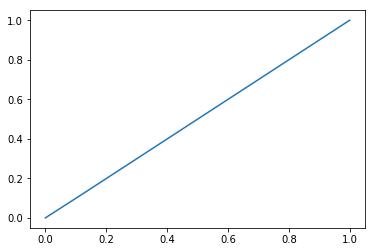

Processing tag: *special
Test accuracy is 0.9942857142857143
Test recall_score is 0.0
Test precision_score is 0.0
Test f1_score is 0.0



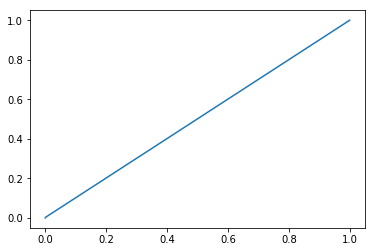

Processing tag: math
Test accuracy is 0.9485714285714286
Test recall_score is 0.0
Test precision_score is 0.0
Test f1_score is 0.0



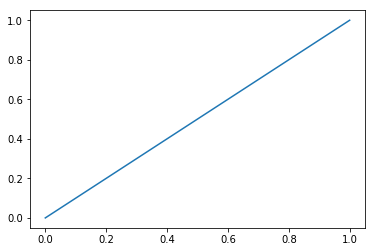

Processing tag: trees
Test accuracy is 0.9565714285714285
Test recall_score is 0.0
Test precision_score is 0.0
Test f1_score is 0.0



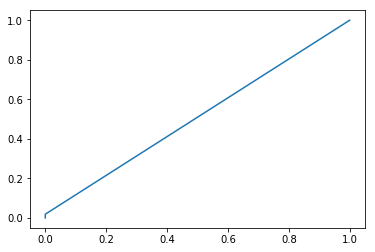

Processing tag: ternary search
Test accuracy is 0.9714285714285714
Test recall_score is 0.0
Test precision_score is 0.0
Test f1_score is 0.0



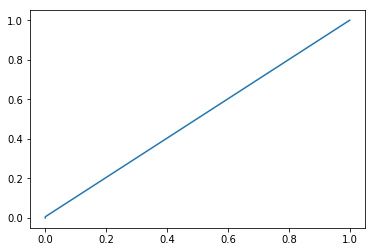

Processing tag: data structures
Test accuracy is 0.8857142857142857
Test recall_score is 0.0
Test precision_score is 0.0
Test f1_score is 0.0



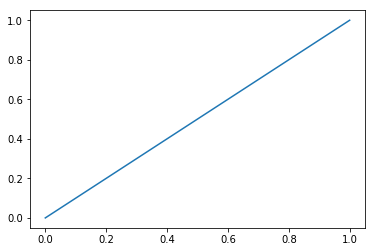

Processing tag: shortest paths
Test accuracy is 0.9874285714285714
Test recall_score is 0.0
Test precision_score is 0.0
Test f1_score is 0.0



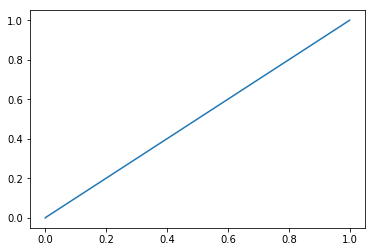

Processing tag: constructive algorithms
Test accuracy is 0.8925714285714286
Test recall_score is 0.0
Test precision_score is 0.0
Test f1_score is 0.0



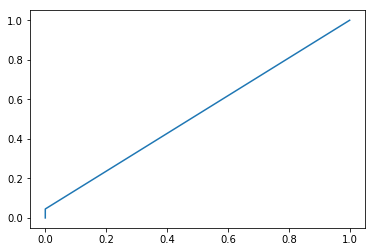

Processing tag: dsu
Test accuracy is 0.9931428571428571
Test recall_score is 0.0
Test precision_score is 0.0
Test f1_score is 0.0



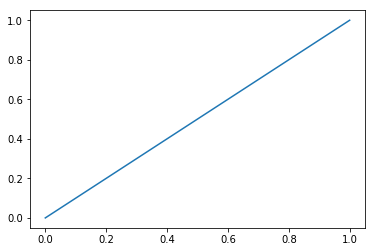

Processing tag: graphs
Test accuracy is 0.9108571428571428
Test recall_score is 0.0
Test precision_score is 0.0
Test f1_score is 0.0



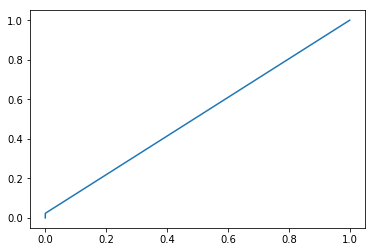

Processing tag: expression parsing
Test accuracy is 0.96
Test recall_score is 0.0
Test precision_score is 0.0
Test f1_score is 0.0



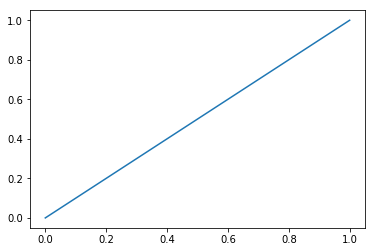

Processing tag: strings


IndexError: index 34 is out of bounds for axis 1 with size 34

In [12]:
global distinct_tags

X_train,X_test,y_train_text,target_names = data_preprocessing()


mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(y_train_text)

classifier = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', OneVsRestClassifier(LinearSVC(penalty="l2",loss="squared_hinge",dual=True,tol=0.0000001, C=1.0, 
            multi_class="ovr",random_state=0, max_iter=1000)))])

classifier2 = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC(penalty="l2",loss="squared_hinge",dual=True,tol=0.0000001, C=1.0, 
            multi_class="ovr",random_state=0, max_iter=1000))])

# print(X_train.shape)

classifier.fit(X_train, Y)
predicted = classifier.predict(X_test)
all_labels = mlb.inverse_transform(predicted)

for item, labels in zip(target_names, all_labels):
        print('{0} => {1}'.format(item, ', '.join(labels)))

print()
print()

actual_y = []
predicted_list = []

for index in range(len(distinct_tags)-1):
    
    print('Processing tag: {}'.format(distinct_tags[index]))
    classifier2.fit(X_train, Y[:,index])
    predicted = classifier2.predict(X_test)
    
#     print(predicted)
#     print("##########################################################")
#     print(target_names.iloc[:,index])
    #     print(mlb.fit_transform(target_names)[:,index])
    
#     actual_y.append(mlb.fit_transform(target_names)[:,index])
#     predicted_list.append(predicted)
    
    print('Test accuracy is {}'.format(accuracy_score(mlb.fit_transform(target_names)[:,index], predicted)))
    print('Test recall_score is {}'.format(recall_score(mlb.fit_transform(target_names)[:,index], predicted)))
    print('Test precision_score is {}'.format(precision_score(mlb.fit_transform(target_names)[:,index], predicted)))
    print('Test f1_score is {}'.format(f1_score(mlb.fit_transform(target_names)[:,index], predicted)))
    
    print()
    
    y_true = mlb.fit_transform(target_names)[:,index]
    y_probas = predicted
    fpr, tpr, thresholds = roc_curve(y_true, y_probas, pos_label=0)

#     print("$$$$$$$$$$$$$$$$$$$$$$$$")
#     print(fpr, tpr, thresholds)
#     print("$$$$$$$$$$$$$$$$$$$$$$$$")
    
    # Print ROC curve
    plt.plot(fpr,tpr)
    plt.show() 

    # Print AUC
    auc = np.trapz(tpr,fpr)
    print('AUC:', auc)